In [1]:
# Import libraries

import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r"C:\Users\tiffk\Instacart Basket Analysis 22-05-2024"

In [3]:
%%time
# Import data

ords_prods_merge_v4 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_v4.pkl'))

CPU times: total: 5.44 s
Wall time: 9.98 s


## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

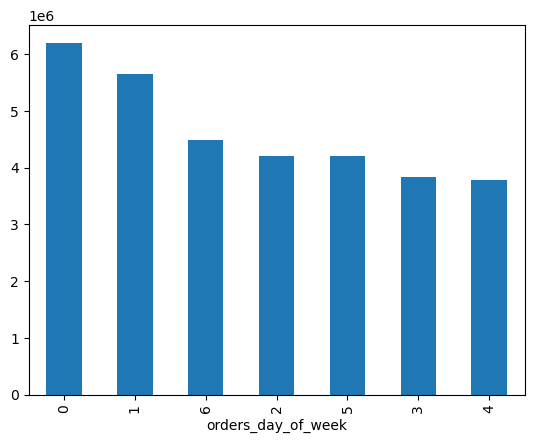

In [4]:
# Similar to printing the frequency of a column - just add on ".plot.bar()"

ords_prods_merge_v4['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

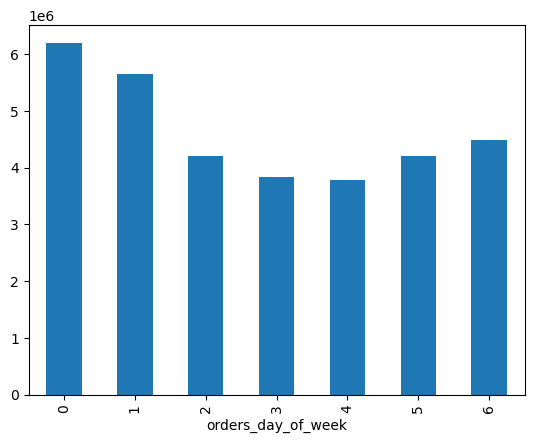

In [5]:
# To sort by index instead of frequency:

ords_prods_merge_v4['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

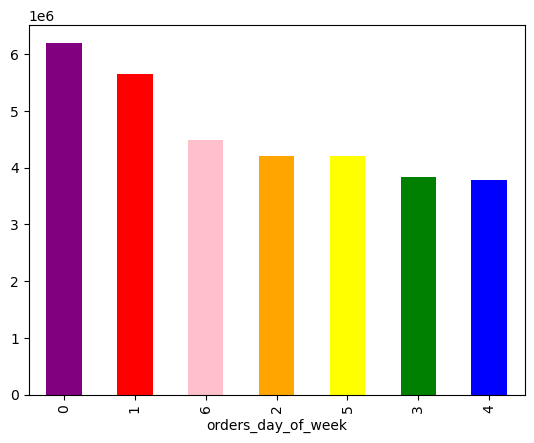

In [6]:
# Adding colours

ords_prods_merge_v4['orders_day_of_week'].value_counts().plot.bar(
    color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

<Axes: xlabel='orders_day_of_week'>

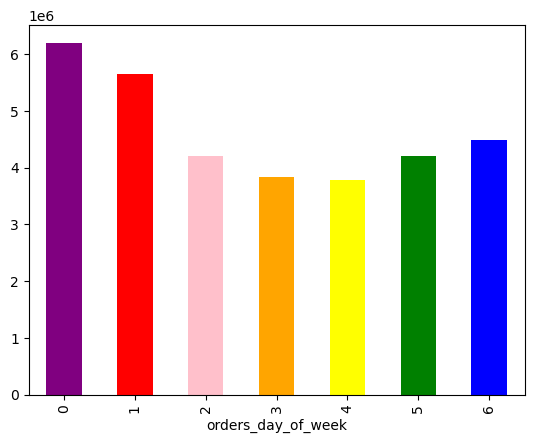

In [7]:
# Does the colour order hold when adding the sort_index function?

ords_prods_merge_v4['orders_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

It does

## Exporting Charts

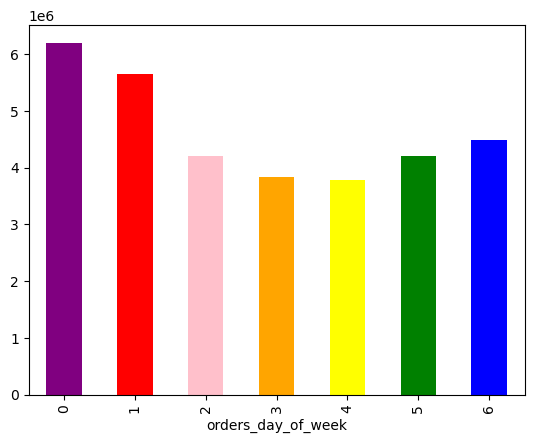

In [8]:
# First, save the chart in a variable/object

bar = ords_prods_merge_v4['orders_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# Now the chart can be saved as image file with "figure.savefig()"

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

## Creating Histograms & Scatterplots

<Axes: ylabel='Frequency'>

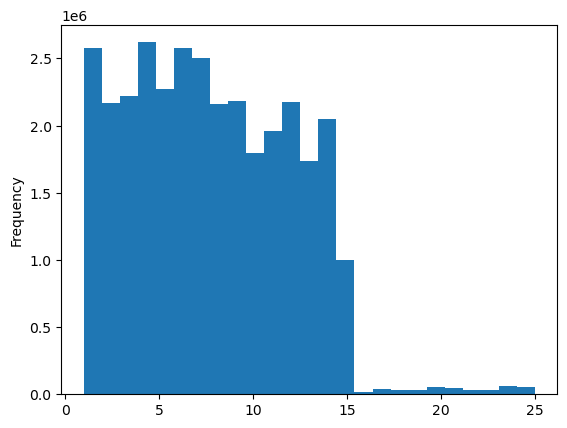

In [10]:
# Similar to creating a bar chart - remove value_counts() and replace plot.bar() with plot.hist(bins = n)

ords_prods_merge_v4['prices'].plot.hist(bins = 25)

Note - I already removed the 2 outlier products

<Axes: ylabel='Frequency'>

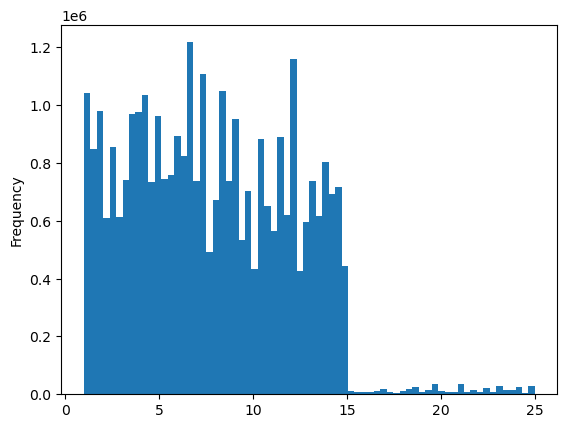

In [11]:
# Increase granularity by setting bins = 70

ords_prods_merge_v4['prices'].plot.hist(bins = 70)

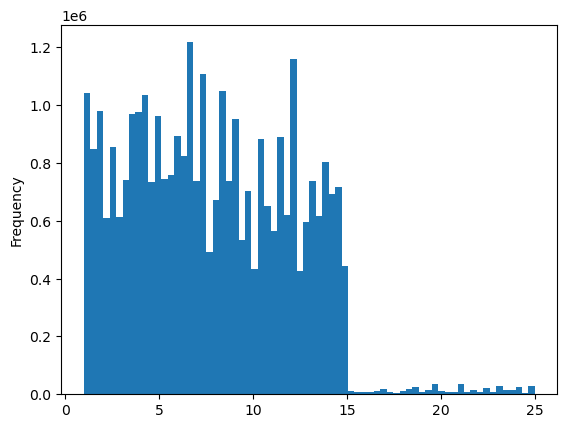

In [12]:
# Save as object

hist = ords_prods_merge_v4['prices'].plot.hist(bins = 70)

In [13]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_prices.png'))

## Creating Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

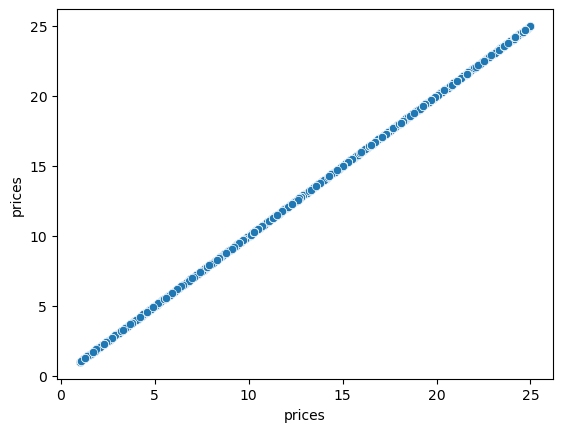

In [14]:
# For a scatterplot the notation is sns.scatterplot(x = 'column 1', y = 'column 2', data = df)

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge_v4)

This chart is only useful as a consistency check (ensuring there aren't any outliers in the price column

## Sampling Data

In [4]:
# Assign a seed 

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge_v4)) <= 0.7

In [5]:
dev

array([False,  True, False, ..., False,  True,  True])

"len" argument ensures that the list of randomly generated numbers is equal to the length of the object put inside its brackets (i.e., a list as long as there are rows in the dataframe ords_prods_merge_v4)

In [6]:
np.random.rand(10)

array([0.23055224, 0.64519968, 0.82012101, 0.90021919, 0.2001039 ,
       0.0323489 , 0.7061233 , 0.10883532, 0.00193764, 0.89102284])

In [7]:
# Store 70% of the dataframe in the big sample

big = ords_prods_merge_v4[dev]

In [8]:
# Store 30% of the dataframe in the small sample

small = ords_prods_merge_v4[~dev]

In [9]:
# Check sample splits was successful

len(ords_prods_merge_v4)

32399732

In [10]:
len(big) + len(small)

32399732

In [11]:
# Increase porcessing time by only storing relevant columns

df_2 = small[['orders_day_of_week','prices']]

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


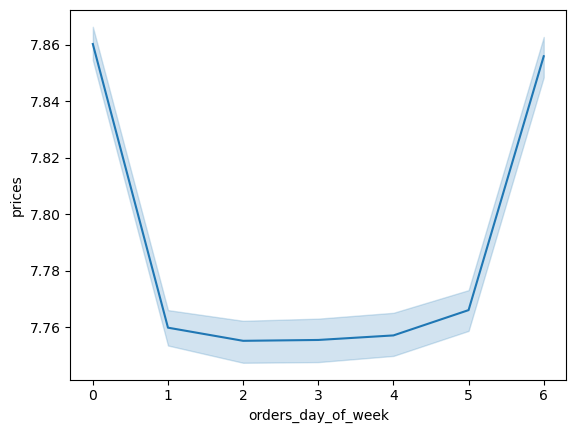

In [13]:
# Line plot

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

This can be checked against a line chart for the full dataframe

In [14]:
# Take only relevant columns:

df_3 = ords_prods_merge_v4[['orders_day_of_week', 'prices']]

C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kyles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


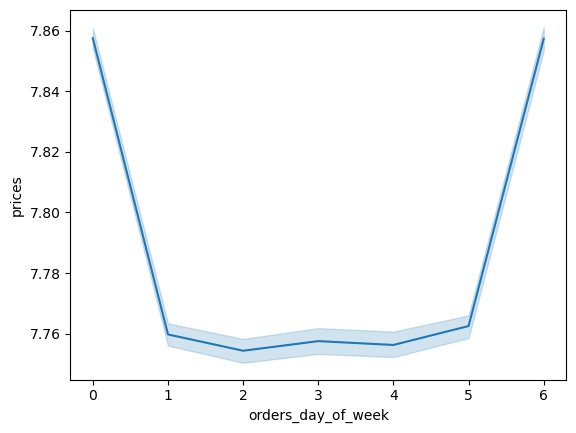

In [16]:
line_2 = sns.lineplot(data = df_3, x = 'orders_day_of_week', y = 'prices')

In [18]:
# Export line chart

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_chart_prices_vs_orders_dow.png'))